# Using APIs and Intro to Machine Learning

#### Albert Zhu

## Using an API

In [1]:
# Importing necessary libraries
import urllib
import requests
import time

### Finding Song Lyrics

In [2]:
# Base URL:
base_url = "https://api.lyrics.ovh/v1/"

# User's input
song = raw_input("Song: ")
artist = raw_input("Artist: ")

# Create a new url based on users requests:
data = requests.get(base_url + artist + "/" + song).json()
print(data['lyrics'])

# Making sure the API returned a value

Song: remember_the_name
Artist: fort_minor
You ready?
Let's go

Yeah
For those of you that wanna know what we're all about
It's like this y'all, come on

This is ten percent luck, twenty percent skill
Fifteen percent concentrated power of will
Five percent pleasure, fifty percent pain
And a hundred percent reason to remember the name

(Mike)
He doesn't need his name up in lights
He just wants to be heard, whether it's the beat or the mic
He feels so unlike everybody else, alone
In spite of the fact that some people still think that they know him
But fuck 'em, he knows the code, it's not about the salary
It's all about reality and making some noise
Makin' a story, makin' sure his clique stays up
That means when he puts it down, Tak's pickin' it up

(Let's go)
Who the hell is he anyway? He never really talks much
Never concerned with status, but still leaving 'em star-struck
Humbled through opportunities given despite the fact
That many misjudge him 'cause he makes a livin' from writing 

## Making an API

In [3]:
# Necessary imports
import random
from flask import Flask, request
import random

### Random Number API

In [17]:
# Initialize flask app
app = Flask(__name__)

# On the main page, return a random number (as a string)
@app.route("/", methods = ['GET'])
def first_api():
    # x = random.randrange(1, 10)
    return "Hello"





#Run the app
app.run()


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [30/Oct/2019 23:36:08] "GET / HTTP/1.1" 200 -


### Addition API

In [19]:
# Initialize flask app
app = Flask(__name__)

# On the main page, return a random number (as a string)
@app.route("/first", methods=['GET'])
def first_api():
    x = random.randrange(1,10)
    return str(x)



# On the add page, take two arguments, add them, and return the string
@app.route("/add", methods=['GET'])
def add():
    x = request.args.get("first")
    y = request.args.get("second")
    return str(int(x) + int(y))

#Run the app
app.run()

# http://127.0.0.1:5000/add?first=52&second=64

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [30/Oct/2019 23:36:40] "GET /add?first=52&second=64 HTTP/1.1" 200 -


## Data Science

In [4]:
# Necessary imports:
import json
import pandas as pd
from pandas.plotting import parallel_coordinates
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import random
import os

# Setting up current directory:
CURRENT_DIRECTORY = os.getcwd()

### K Nearest Neighbors

In [6]:
# Importing data from a csv file
dataset = pd.read_csv(CURRENT_DIRECTORY + "/winequality-white.csv")

# Adding an Id tag to the dataframe
dataset["Id"] = range(4898)

# Check how many of each species we have

# splitting up the labels and the values for each species:
feature_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
X = dataset[feature_columns].values
Y = dataset['quality'].values


# Encoding Labels (Turning quality ratings into integers)
# 3 (lowest rating given) -> 0
# 4 -> 1
# 5 -> 2
# etc
le = LabelEncoder()
Y = le.fit_transform(Y)
Y

# dataset

array([3, 3, 3, ..., 3, 4, 3], dtype=int64)

### Visualize the data

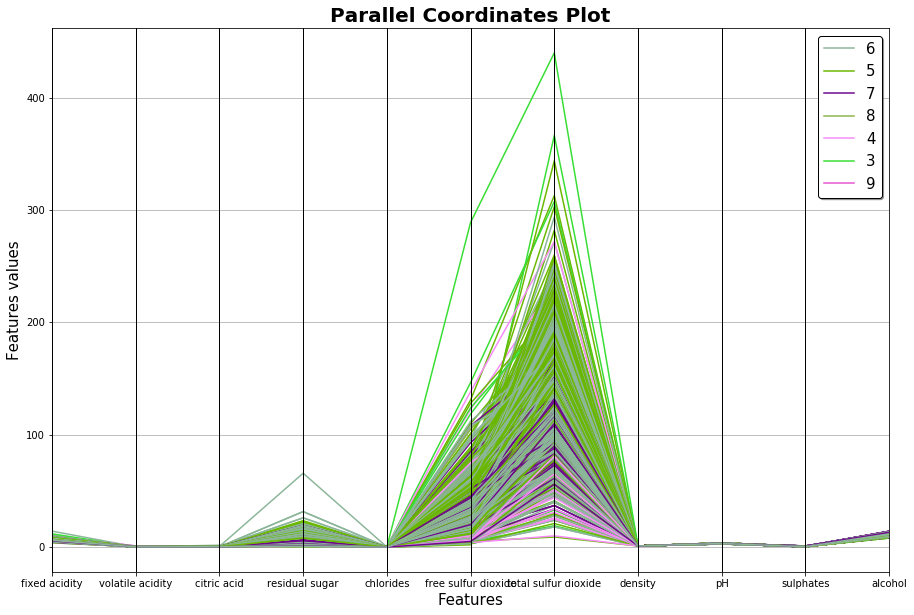

In [7]:
# Data Visualization:
plt.figure(figsize=(15,10))
parallel_coordinates(dataset.drop("Id", axis=1), "quality")
plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

### Train the model

In [8]:
# Splitting into training and test datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

# Creating the learning model
knn_classifier = KNeighborsClassifier(n_neighbors=9)

# Fitting the model with the training data
knn_classifier.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform')

### Test the model

In [9]:
# Making predictions with the test data (This line is also where we would potentially classify new data)
Y_pred = knn_classifier.predict(X_test)
print(Y_pred)
print(Y_test)

# Finding Accuracy:
accuracy = accuracy_score(Y_test, Y_pred)*100
print('Accuracy of model: ' + str(round(accuracy, 2)) + ' %.')

[2 2 3 ... 3 3 3]
[2 3 4 ... 3 3 3]
Accuracy of model: 46.67 %.


### Try out different k values

<Figure size 432x288 with 0 Axes>

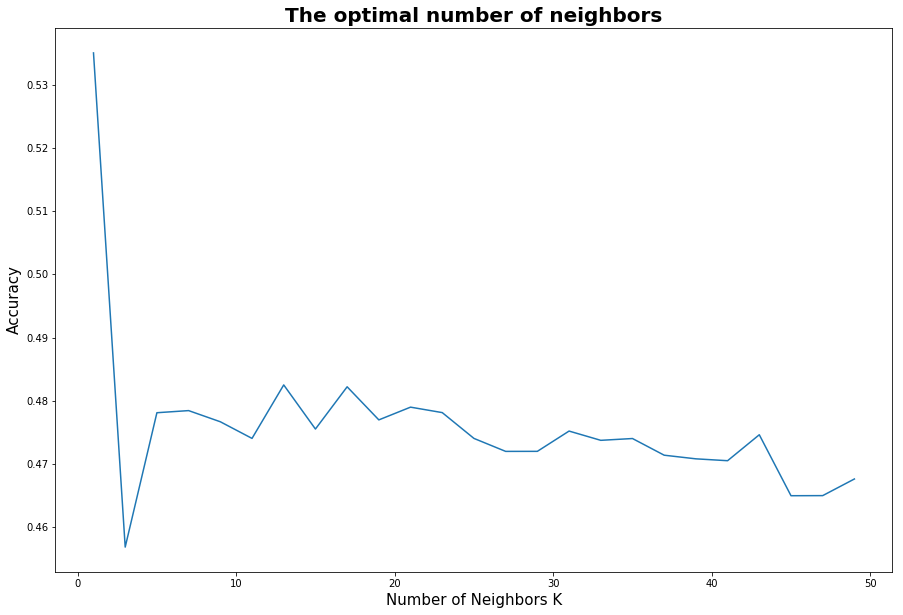

In [10]:
# creating list of cv scores
cv_scores = []
k_list = [i for i in range(1, 50, 2)]

# perform 10-fold cross validation
for k in range(1,50,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, Y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())



# Displaying results visually
plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.plot(k_list, cv_scores)

plt.show()

## Making an API for our model

In [11]:
# Set up Flask App
app = Flask(__name__)

@app.route("/", methods = ['GET'])
def classify():
    # array mapping numbers to quality scores
    classes = ["6", "5", "7", "8", "4", "3", "9"]
    # classes = [ "Iris Setosa", "Iris Versicolor", "Iris Virginica"]
    
    # get values for each component, return error message if not a float
    try:
        values = [[float(request.args.get(component)) for component in ["fAcidity", "vAcidity", "cAcid", "rSugar", "chlorides", "fSO2", "tSO2", "density", "pH", "sulphates", "alcohol"]]]
    except TypeError:
        return "An error occured\nUsage: 127.0.0.1:5000?fAcidity=NUM&vAcidity=NUM&cAcid=NUM&rSugar=NUM&chlorides=NUM&fSO2=NUM&tSO2=NUM&density=NUM&pH=NUM&sulphates=NUM&alcohol=NUM"
    
    # Otherwise, return the prediction.
    prediction = knn_classifier.predict(values)[0]
    return classes[prediction]

# Run the app.
app.run()

# try 127.0.0.1:5000?fAcidity=8.5&vAcidity=0.26&cAcid=0.21&rSugar=16.1&chlorides=0.075&fSO2=150&tSO2=420&density=0.997&pH=3.02&sulphates=0.5&alcohol=9.8

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [30/Oct/2019 23:49:39] "GET /?fAcidity=8.5&vAcidity=0.26&cAcid=0.21&rSugar=16.1&chlorides=0.075&fSO2=150&tSO2=420&density=0.997&pH=3.02&sulphates=0.5&alcohol=9.8 HTTP/1.1" 200 -
